In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
import os

In [2]:
#How do I #define in python?
DAYS_IN_YEAR = 365
DAYS_MARKET_IS_OPEN = 252

In [9]:
def sum_of_sq_diff(series1: np.array, series2: np.array):
    """
    Sum of square differences of the two series. 
    Must both be numpy arrays of the same size.
    """
    size = series1.__len__()
    assert size == series2.__len__(), f'Series 1 has size {size} while Series 2 has size {series2.__len__()}'

    #Check for normalization
    #if np.max(series1) > 1.0:
    #    series1 = normalize_data(series1)
    #if np.max(series2) > 1.0:
    #    series2 = normalize_data(series2)

    sum = 0
    for i in range(size):
        absdiff = abs(series1[i] - series2[i])
        absdiff**2
        sum += absdiff
    
    sum = sum / float(size)
    return sum


def normalize_data(series: np.array):
    """
    Returns the array with each entry divided by the series max.
    """
    max = np.max(series)
    return series/max

In [10]:
time_series = np.zeros((11, 1007)) 

for k in range(11):
    df = pd.read_excel("Data\\Normalized Data with top k removed.xlsx", header=0, sheet_name=f'Worst {5*k} removed')
    stocks = np.ndarray((df.__len__(), DAYS_MARKET_IS_OPEN))
    volume = []
    num_intervals = df.columns.__len__() -2- DAYS_MARKET_IS_OPEN 

    for r in range(num_intervals):
        clear_output(wait=True)

        #This end days dont exactly match up, but there could be some 
        #unaccounted days the market is not open, so this is fine
        interval = df.columns[3+r:3+r+DAYS_MARKET_IS_OPEN]
        df_subset = df[interval]

        for i in range(df_subset.__len__()):
            stocks[i, :] = df_subset.iloc[i, :].to_numpy(dtype=float)

        #Normalize stocks
        for i, row in enumerate(stocks):
            stocks[i, :] = normalize_data(row)

        #Sum to append to volume array
        sum = 0
        #Getting sum of Squares
        edge_weight = []
        for i in range(stocks.shape[0]):
            for j in range(i+1, stocks.shape[0]):
                sum += sum_of_sq_diff(stocks[i], stocks[j])
        
        volume.append(sum)
        print(f'Round {k} Percentage Done: {round(r / num_intervals * 100.0, 3)}')

    volume = np.array(volume)
    time_series[k, :] = volume



Round 10 Percentage Done: 99.901


In [18]:
time_series.shape[0]

11

In [20]:
column_names = [f'Worst {5*k} Removed' for k in range(time_series.shape[0])]

# Create a DataFrame
df = pd.DataFrame(time_series.T, columns=column_names)

# Save to Excel
df.to_excel('Worst k Removed Correlation.xlsx', index=False)

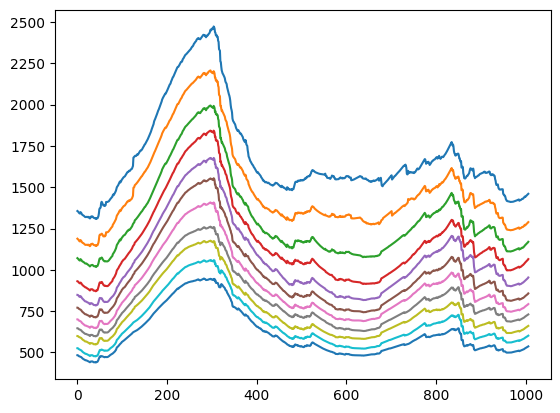

In [26]:
for i in range(11):
    plt.plot(time_series[i, :])

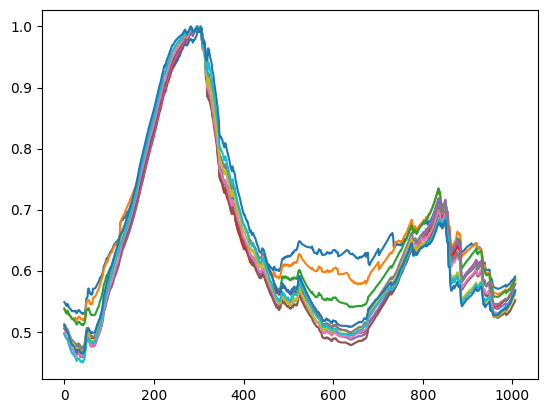

In [25]:

for i in range(11):
    plt.plot(time_series[i, :] / max(time_series[i, :]))

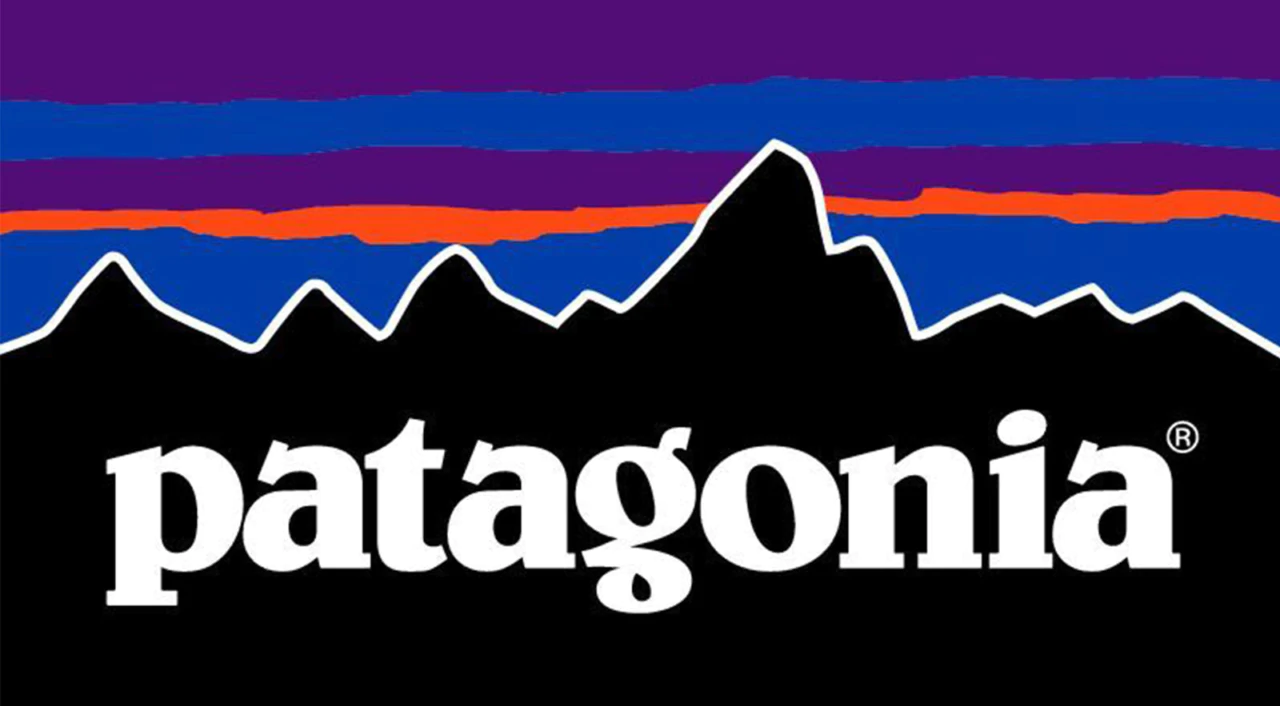

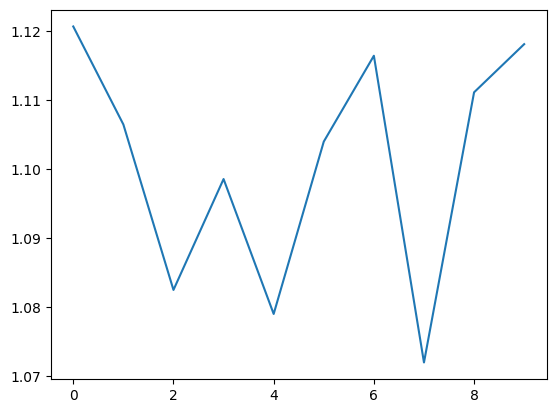

In [24]:
peak = []
for i in range(10):
    peak.append(max(time_series[i, :])/max(time_series[i+1, :]))
plt.plot(peak)